In [434]:
! pip install plotnine

In [435]:
import pandas as pd
from plotnine import *
from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA, TruncatedSVD
from util.datasource import anything, corroles
from util.analysis import ext_modes, plot_selector, perc_comp, perc_ext


In [436]:
df = corroles.dataFrame

In [437]:
conformation = df[perc_ext].fillna(0)
# conformation["Doop"] = df["Doop (exp.)"]
# conformation["Cavity"] = df["Cavity"]

In [438]:
tsne = TSNE(n_components=2)

In [439]:
X = conformation.values

In [440]:
mapping_tsne = tsne.fit_transform(X)

In [441]:
df_tsne = pd.DataFrame(mapping_tsne, columns=["x", "y"])

In [442]:
df_tsne["category"] = df["category"]
df_tsne["CCDC"] = df["CCDC"]
df_tsne["M"] = df["M"]
df_tsne["Group"] = df["Group"]
df_tsne["Doop"] = df["Doop (exp.)"]
df_tsne["Cavity"] = df["Cavity"]
df_tsne = df_tsne.astype({"Group": "str"})
df_tsne


,x,y,category,CCDC,M,Group,Doop,Cavity
0,-2.041293,10.277471,f-Block Corrole,1524773,Dy,Ln,0.176309,6.654947
1,-3.695925,-27.484060,f-Block Corrole,1482209,Ce,Ln,0.769404,7.231808
2,6.224851,-31.145468,f-Block Corrole,930334,U,Ln,1.237161,7.232352
3,6.402606,-31.411081,f-Block Corrole,930333,Th,Ln,1.278831,7.374410
4,-0.628122,-34.257351,f-Block Corrole,1498989,Lu,Ln,1.115809,7.475076
...,...,...,...,...,...,...,...,...
581,-17.228525,7.641644,Freie Corrol Basen,1901425,H,1,1.225750,7.536049
582,-13.773575,7.631828,Freie Corrol Basen,1439714,H,1,1.308250,7.612757
583,-8.371521,20.073528,Freie Corrol Basen,1439715,H,1,1.455821,7.555179
584,-7.690429,21.671242,Freie Corrol Basen,1062260,H,1,1.736491,7.501071


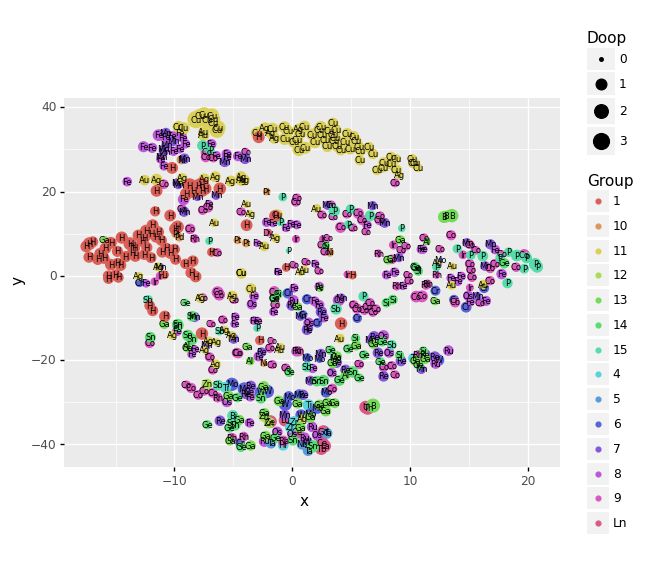

<ggplot: (128553101421)>

In [443]:
ggplot(df_tsne, aes(x="x", y="y")) + geom_point(aes(label="M", colour="Group", size="Doop")) + geom_text(aes(label="M"), size=6)
